In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
import warnings
warnings.simplefilter("ignore")

In [ ]:
#importamos dataset
df = pd.read_csv("/content/data_cart_abandonment.csv")
df

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Session_ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,Session_ID_4279,Yes,23,5.0,6,2.0,0,0,3,0,7,2,1
4280,Session_ID_4280,No,7,2.0,0,3.0,0,0,1,0,0,0,1
4281,Session_ID_4281,No,4,1.0,0,1.0,0,1,1,0,0,0,1
4282,Session_ID_4282,No,8,3.0,0,1.0,0,1,1,0,2,1,1


In [ ]:
#Eliminar el id que no es necesario para los modelos de deep learning
df = df.drop('ID', axis = 1)
df

,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4279,Yes,23,5.0,6,2.0,0,0,3,0,7,2,1
4280,No,7,2.0,0,3.0,0,0,1,0,0,0,1
4281,No,4,1.0,0,1.0,0,1,1,0,0,0,1
4282,No,8,3.0,0,1.0,0,1,1,0,2,1,1


In [ ]:
#Cambiamos las variables de "Yes" y "No" por 0 y 1 
columna = "Is_Product_Details_viewed"
mapeo = {"Yes": 1, "No": 0}
df[columna] = df[columna].replace(mapeo)
df


,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,1,4,1.0,0,0.0,0,0,1,0,0,0,1
1,0,38,0.0,0,2.0,0,0,2,0,2,0,1
2,0,8,5.0,0,0.0,1,1,1,0,0,1,0
3,0,6,0.0,0,2.0,0,0,4,0,0,0,1
4,1,31,14.0,12,1.0,0,0,4,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4279,1,23,5.0,6,2.0,0,0,3,0,7,2,1
4280,0,7,2.0,0,3.0,0,0,1,0,0,0,1
4281,0,4,1.0,0,1.0,0,1,1,0,0,0,1
4282,0,8,3.0,0,1.0,0,1,1,0,2,1,1


In [ ]:
#Se suman los valores nulos
df.isnull().sum()

Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [ ]:
#Se eliminan los valores nulos
df = df.dropna()
df.isnull().sum()

Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [ ]:
#Estandarizamos la data
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
#imprimimos la forma del DF
df.shape

(4271, 12)

In [ ]:
#Estructura de nuestra red neuronal
input_df = Input(shape = (12,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(12, kernel_initializer = 'glorot_uniform')(x)

#autooencoder
autoencoder = Model(input_df, decoded)

# encoder - se utiliza para reducir la dimensionalidad".
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

In [ ]:
#epocas de entrenamiento de nuestro modelo
autoencoder.fit(df_scaled, df_scaled, batch_size = 100, epochs = 100, verbose = 3)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [ ]:
#Se guardan los pesos de nuestra red para no tener que entrenarla nuevamente
autoencoder.save_weights('autoencoder_1.h5')

In [ ]:
#Se utiliza para realizar predicciones sobre un nuevo conjunto de datos utilizando un modelo de codificador entrenado previamente.
pred = encoder.predict(df_scaled)

134/134 [==============================] - 0s 2ms/step


In [ ]:
#Visualizamos los datos escalados
df_scaled

array([[ 1.59327501, -0.61953188, -0.36627444, ..., -0.81839184,
        -0.79810427,  0.41014221],
       [-0.62763804,  1.51243416, -0.513522  , ..., -0.12155142,
        -0.79810427,  0.41014221],
       [-0.62763804, -0.36871235,  0.22271582, ..., -0.81839184,
         0.62278082, -2.43817872],
       ...,
       [-0.62763804, -0.61953188, -0.36627444, ..., -0.81839184,
        -0.79810427,  0.41014221],
       [-0.62763804, -0.36871235, -0.07177931, ..., -0.12155142,
         0.62278082,  0.41014221],
       [-0.62763804,  1.07349997,  0.07546826, ..., -0.46997163,
         0.62278082,  0.41014221]])

In [ ]:
#Visualizamos las predicciones
pred

array([[0.        , 1.0776772 , 0.51330006, ..., 0.23355606, 0.        ,
        0.19736716],
       [0.5078332 , 0.        , 0.10616173, ..., 0.9928781 , 0.        ,
        0.32297012],
       [0.6257626 , 1.7989758 , 0.25700837, ..., 0.07429303, 0.        ,
        2.4418733 ],
       ...,
       [0.07943945, 0.27234668, 0.2954246 , ..., 0.353511  , 0.        ,
        0.48083872],
       [0.6200058 , 0.48616165, 0.37999997, ..., 0.26673016, 0.        ,
        0.43760037],
       [0.92945707, 0.4534155 , 0.30096897, ..., 1.2598048 , 0.        ,
        0.73936826]], dtype=float32)

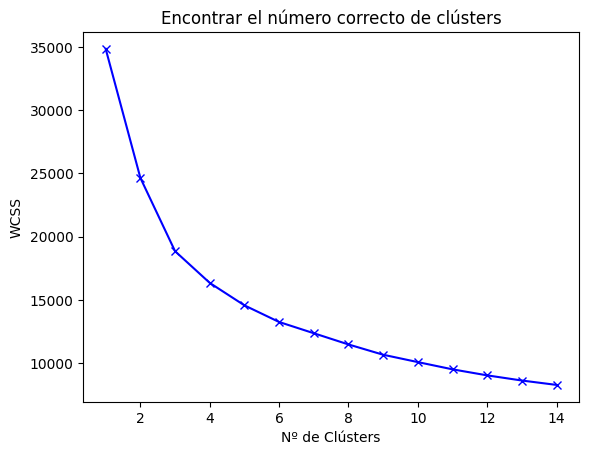

In [ ]:
#Se aplica el metodo del codo para determinar la cantidad de clusters
scores = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

plt.plot(range_values, scores, 'bx-')
plt.title('Encontrar el número correcto de clústers')
plt.xlabel('Nº de Clústers')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Se determinan 2 clusters
kmeans = KMeans(2)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df_scaled)

In [ ]:
#Se le anexa los clusters al csv para saber a que cluster pertenece cada id 
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned,cluster
0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,38.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0
2,0.0,8.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,6.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0
4,1.0,31.0,14.0,12.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,1.0,0.0


In [ ]:
#Se importa
df_cluster_dr.to_excel("cluster_project.xlsx")

In [ ]:
#Comportamiento del consumidor por cluster datos escalados
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,-0.370141,0.74935,0.391304,0.498091,0.498029,1.311901,0.825964,0.255284,0.991721,0.474686,0.503978,-1.533194
1,0.098404,-0.19922,-0.104031,-0.132421,-0.132404,-0.348777,-0.219588,-0.067869,-0.263656,-0.126198,-0.133986,0.407610


In [ ]:
#Comportamiento del consumidor por cluster donde se observa claramente la tendencia a abandonar por clusters
#Observamos que uno confirma la compra y otro no
#Uno tiene un numero de 25 de veses que estuvo activa la session de la cuenta y el otro es de 10
#Con esto podemos predecir el comportamiento del consumidor dentro del eccomerce y predecir que segmento de nuestros clientes pertenece, para adaptar estrategioas de marketing segun sea el caso
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,0.115942,25.830546,6.144928,2.393534,2.480491,0.867336,1.918618,3.841695,0.566332,3.711260,0.916388,0.317726
1,0.326912,10.703023,2.780972,0.458506,1.168050,0.006817,0.729105,1.883817,0.063723,1.986663,0.467398,0.999111


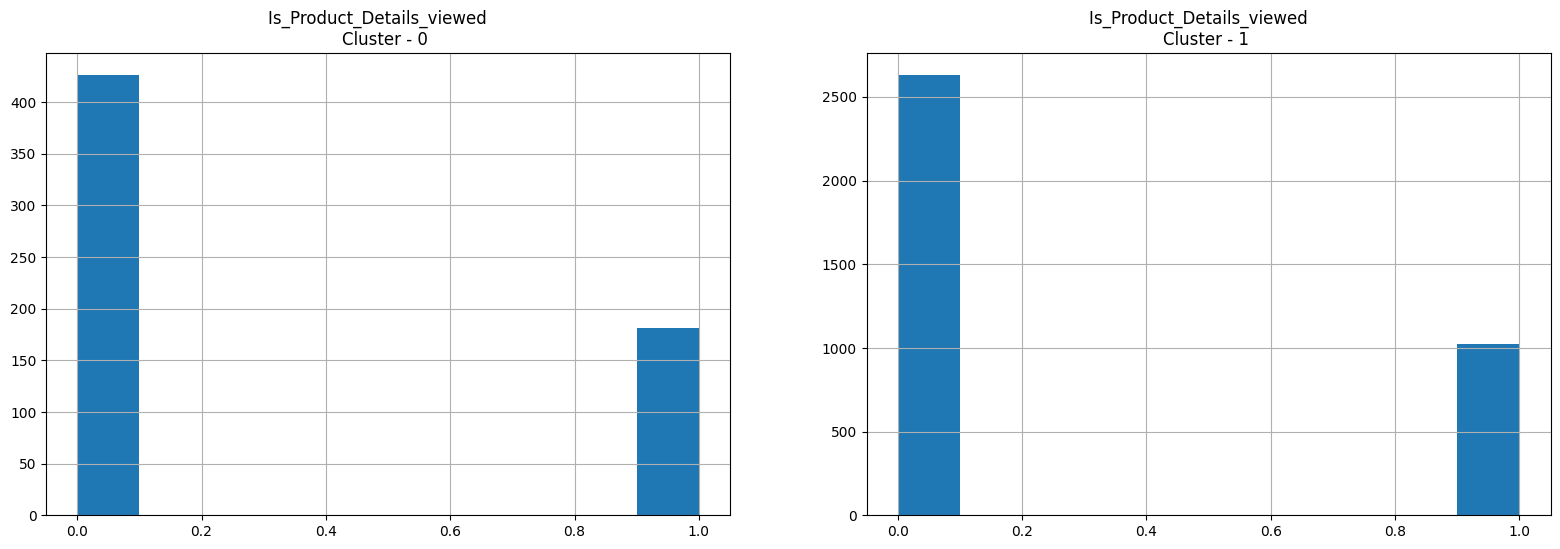

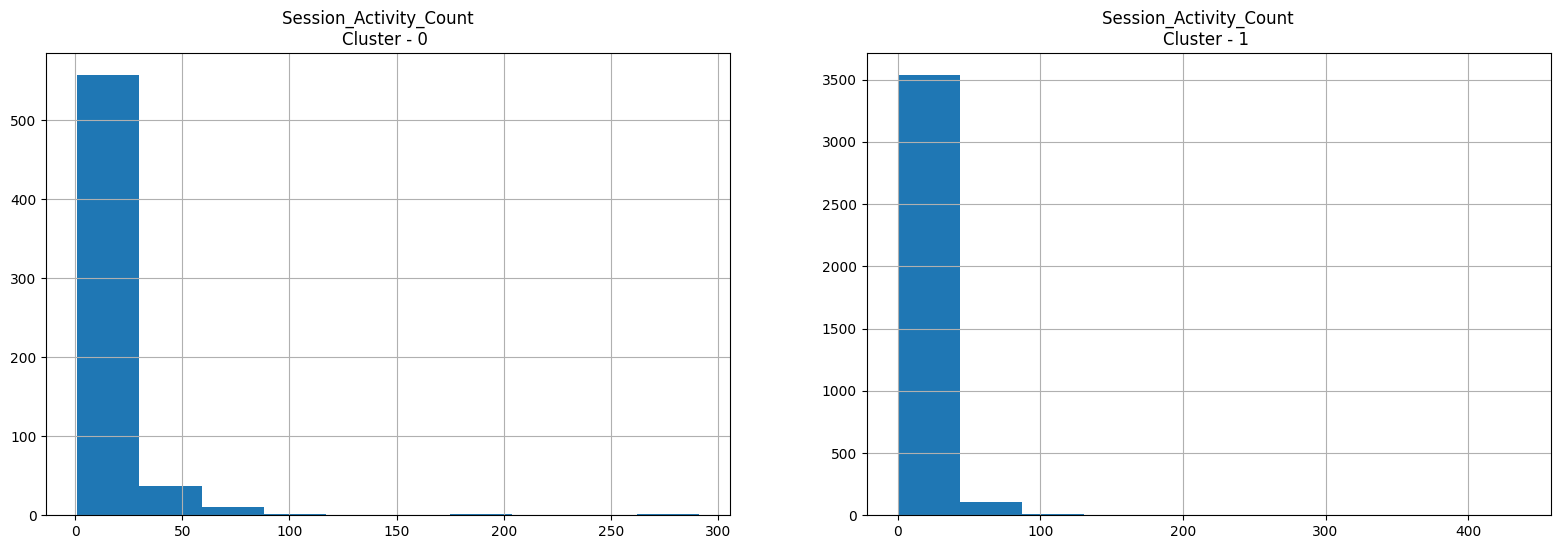

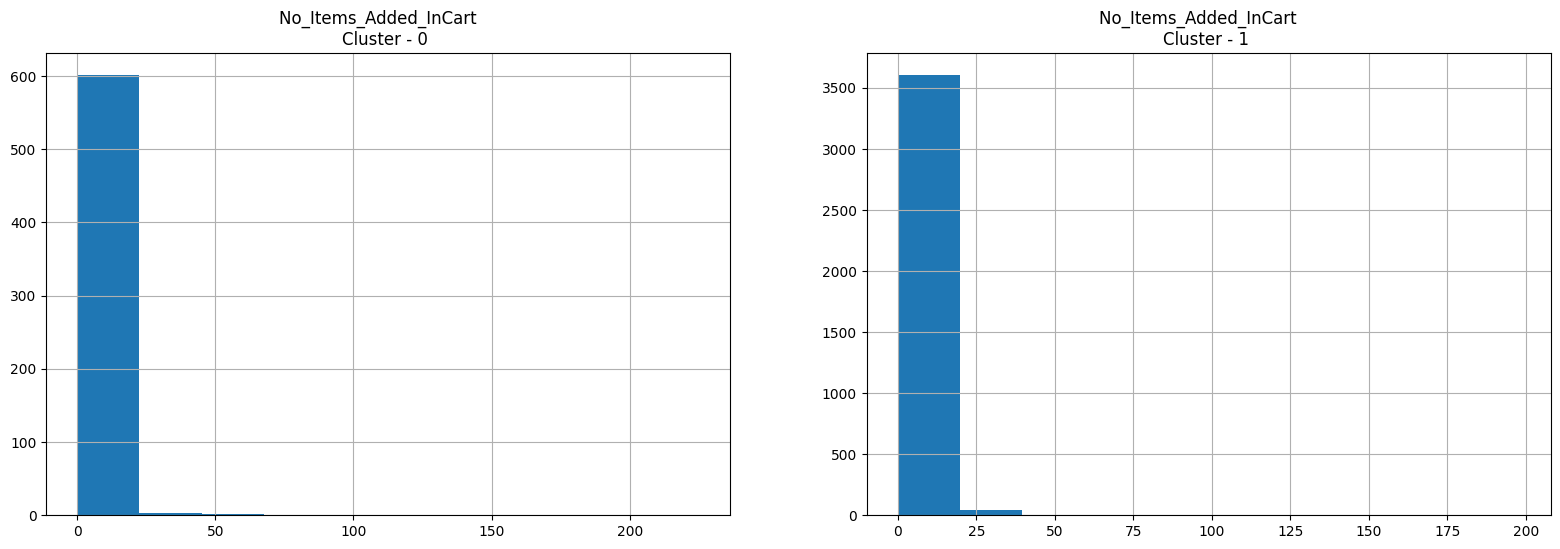

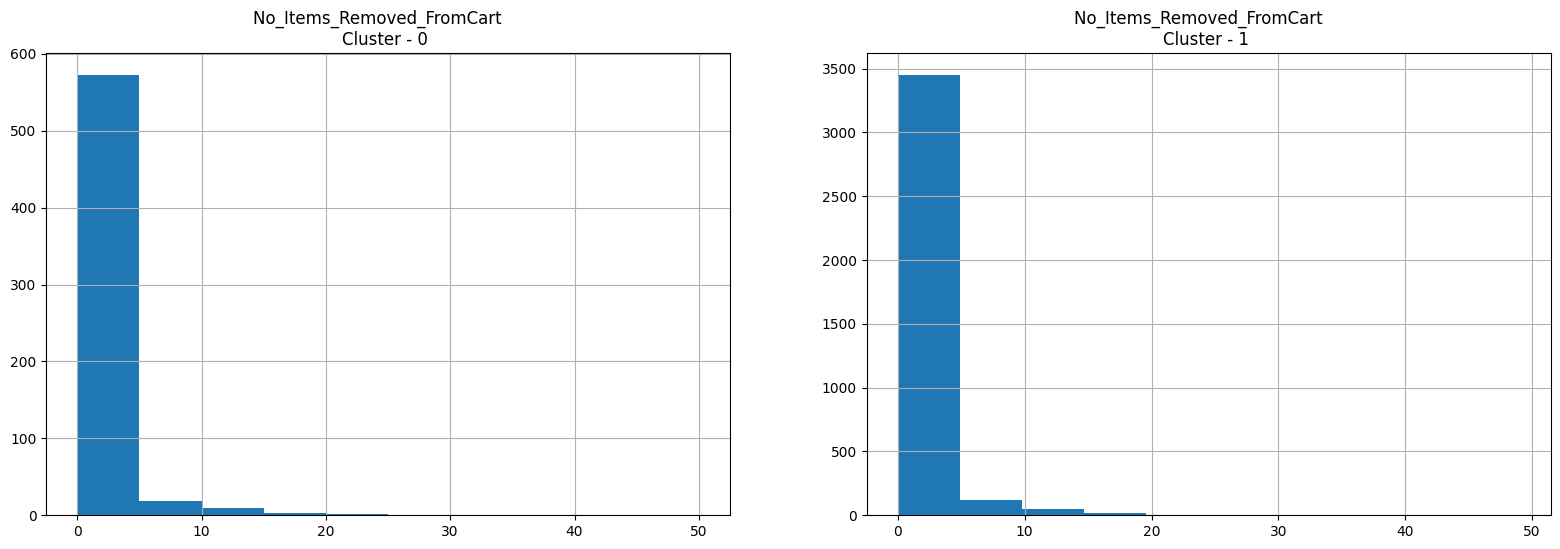

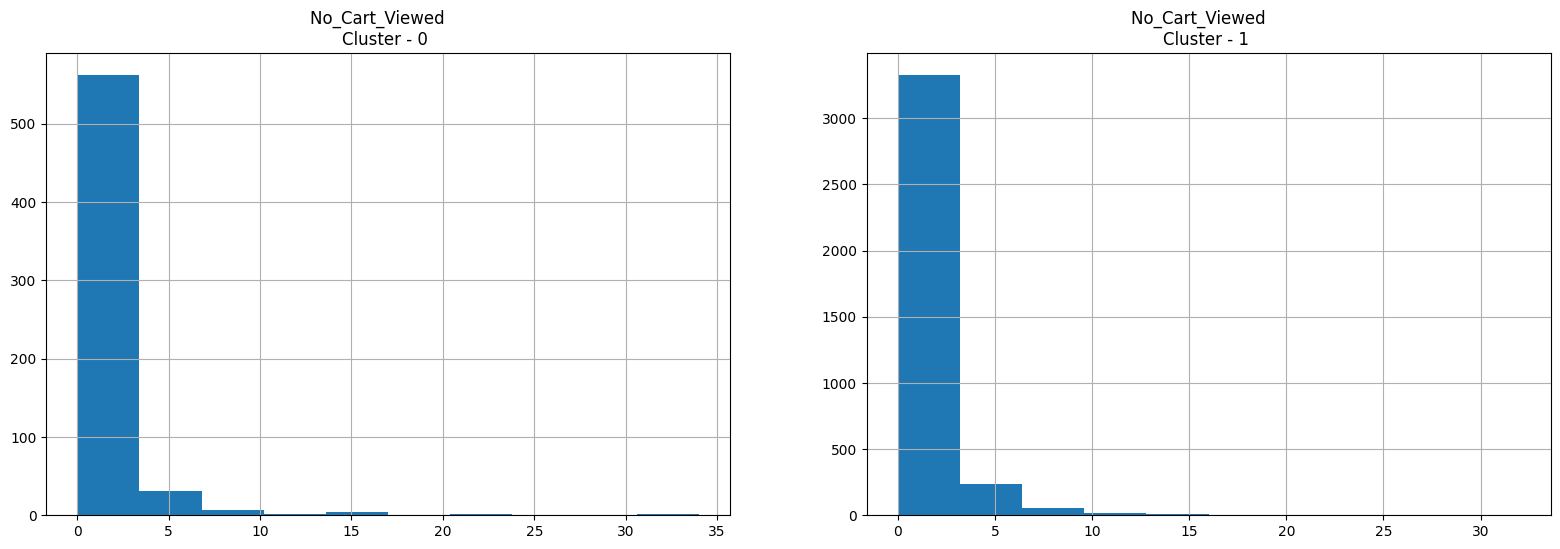

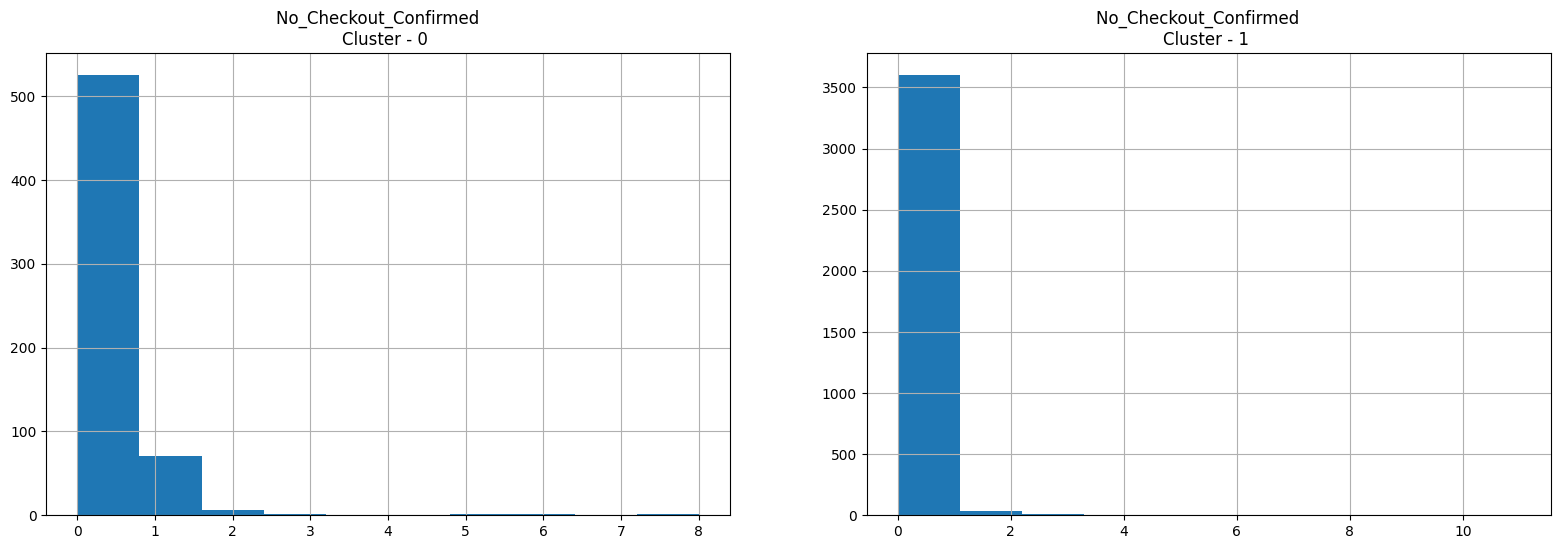

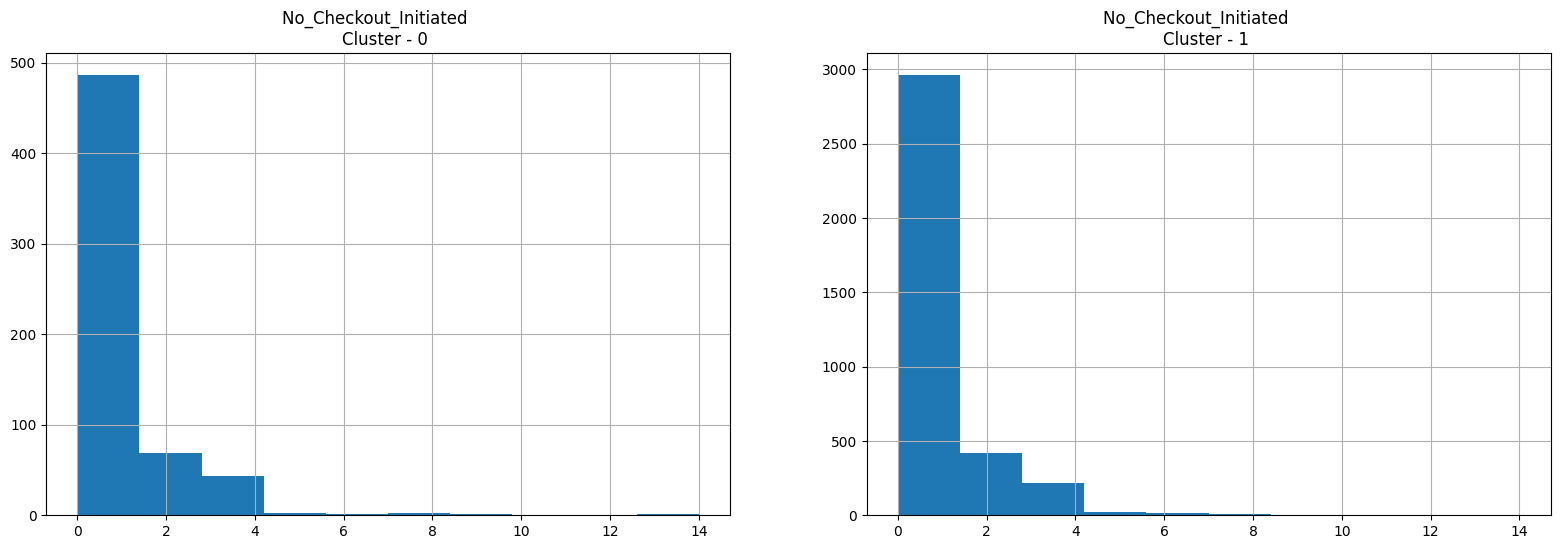

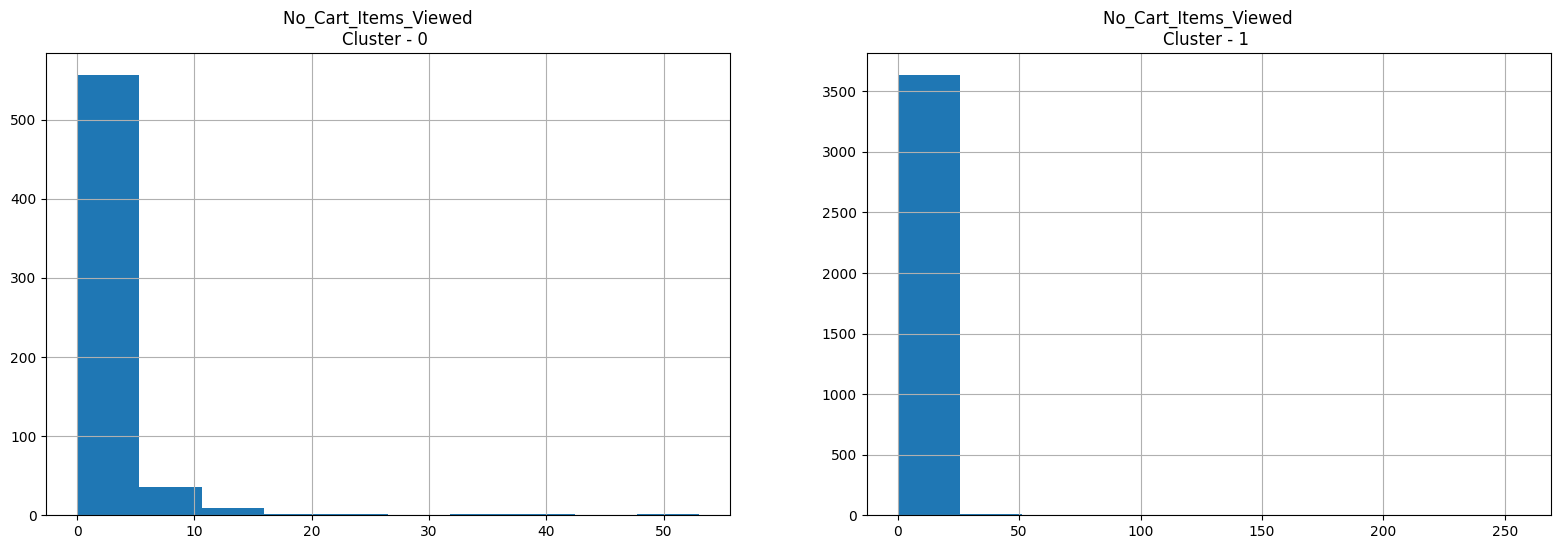

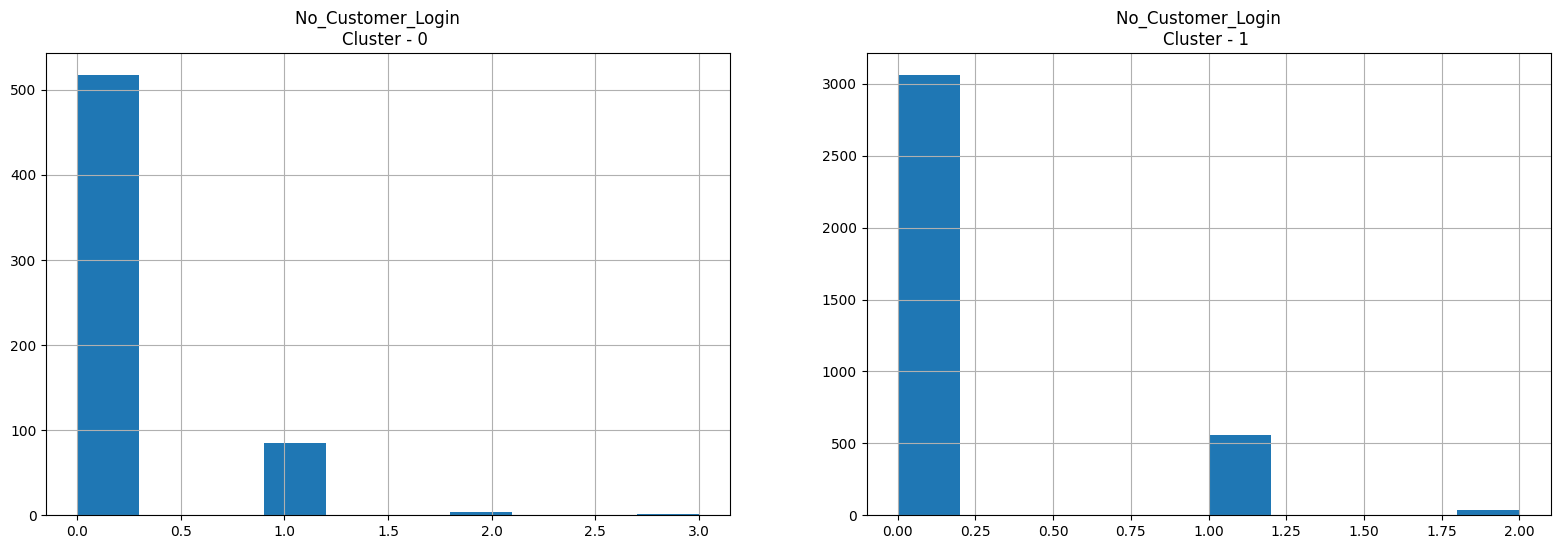

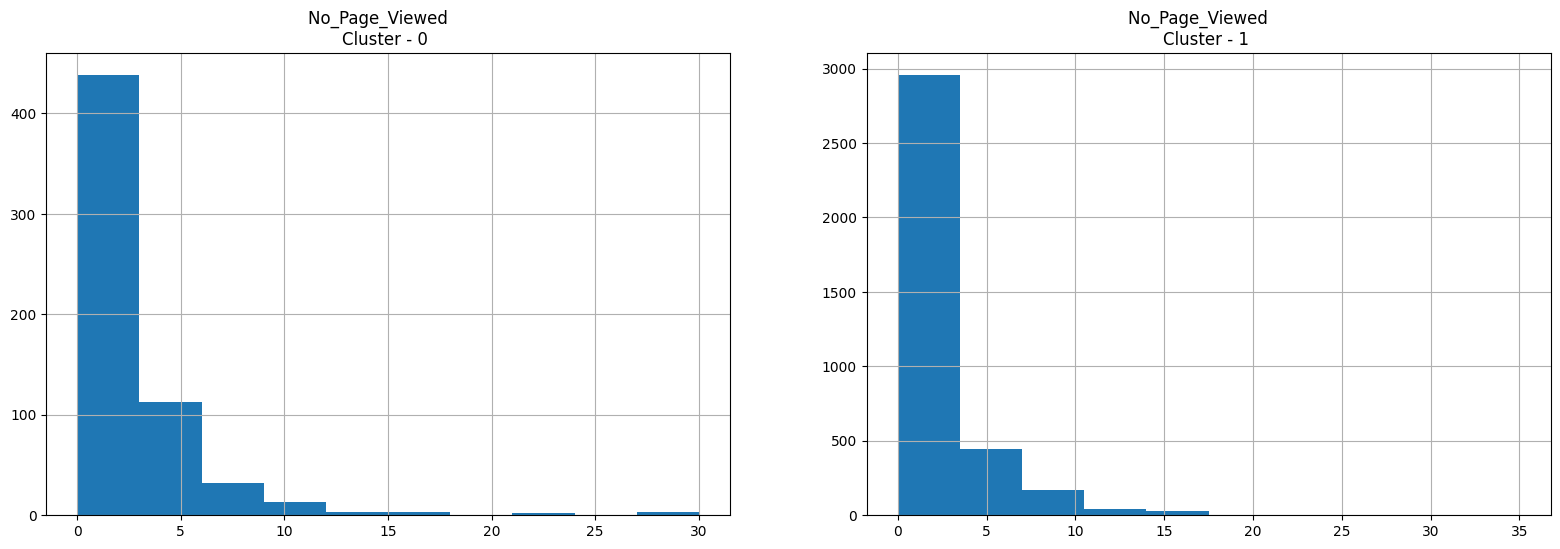

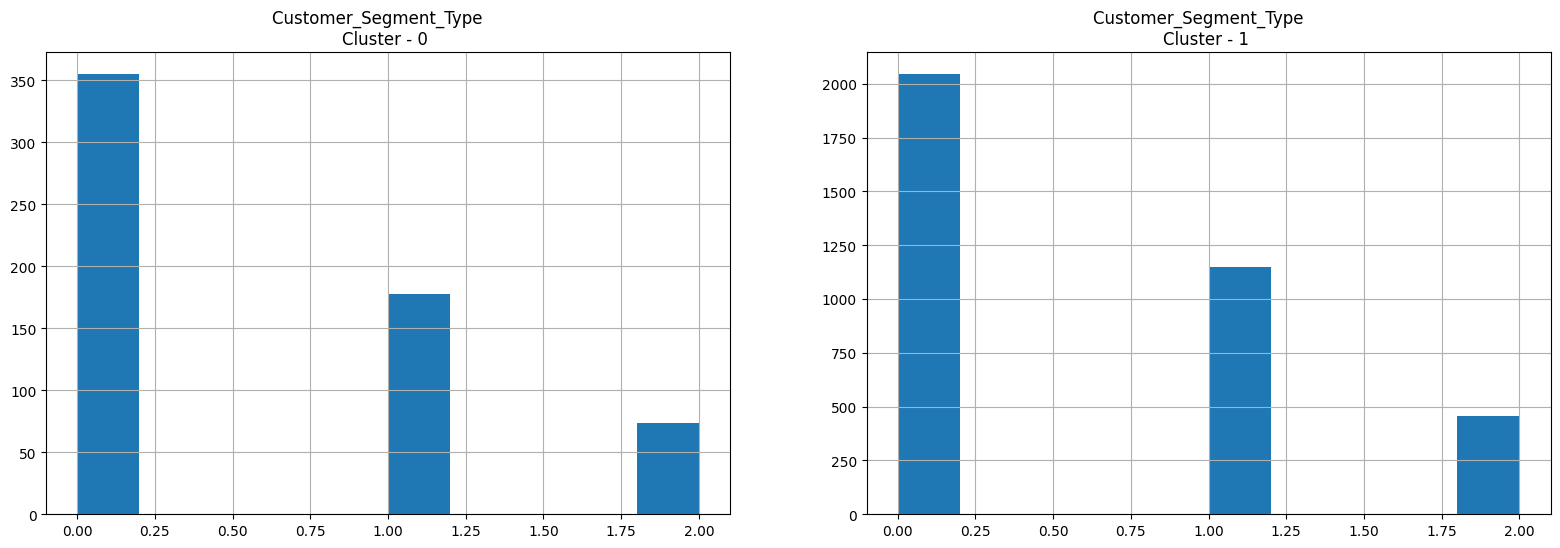

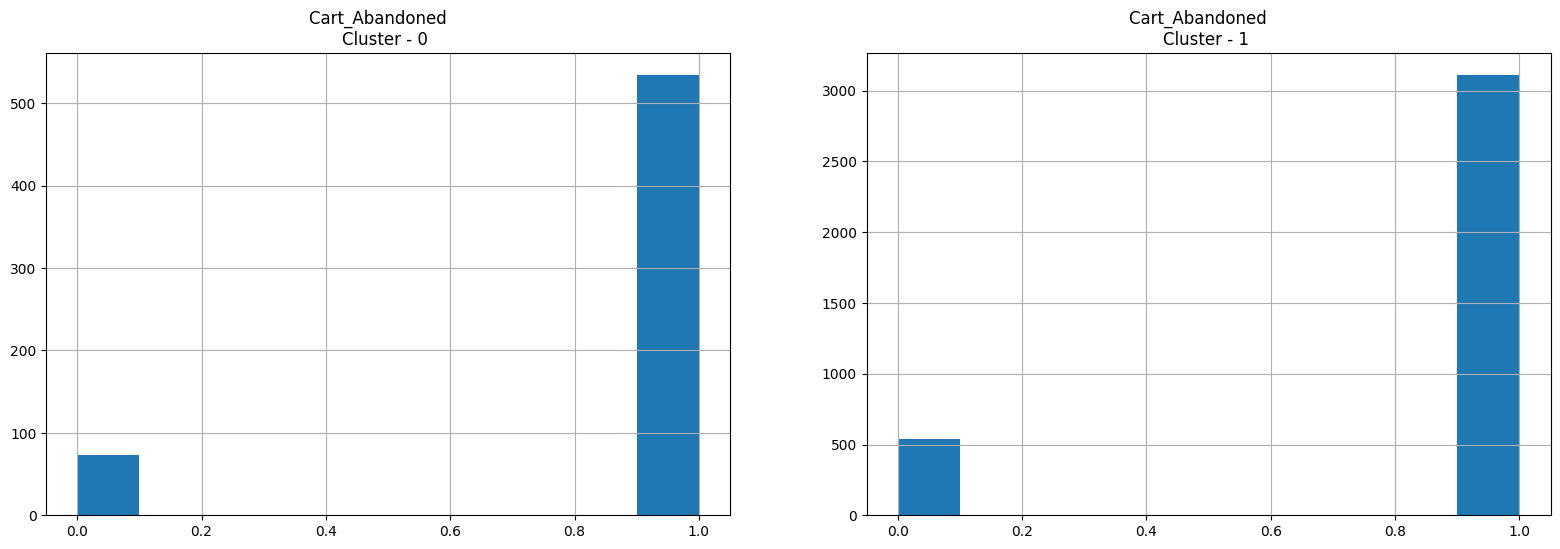

In [ ]:
#Graficamos para tener mejor visualizacion del comportamienton de ambos clusters
for i in df.columns[:12]:
  plt.figure(figsize = (30, 6))
  for j in range(2):
    plt.subplot(1, 3, j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))

  plt.show()